In [11]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import torcheval.metrics

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

import seaborn as sns

import time
import sys
sys.path.append('..')
from tools import *

assert(torch.cuda.is_available())
device = torch.device("cuda")

In [12]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [13]:
train_dataset = TensorDataset( torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long))
test_dataset = TensorDataset( torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long))

batch_size = 256
training_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, pin_memory=True)
testing_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True, pin_memory=True)

In [14]:
binary_accuracy_from_logits = from_logits(torcheval.metrics.functional.binary_accuracy)
binary_f1_from_logits = from_logits(torcheval.metrics.functional.binary_f1_score)

f_loss = torch.nn.functional.cross_entropy
metrics = {"Loss": f_loss, "Accuracy": binary_accuracy_from_logits, "F1 Score": binary_f1_from_logits}
eval_loaders = {"Train": training_loader, "Test": testing_loader}

In [15]:
model = nn.Linear(30, 2)
optimizer = torch.optim.AdamW(model.parameters())
# X0, y0 = test_dataset[1]
# torch.nn.functional.softmax(model(X0.to(device)))

In [18]:
results = train_network( model, optimizer, f_loss, training_loader,
                        eval_loaders=eval_loaders, eval_metrics=metrics, epochs=500)

Epoch: 100%|██████████| 500/500 [00:05<00:00, 85.79it/s]


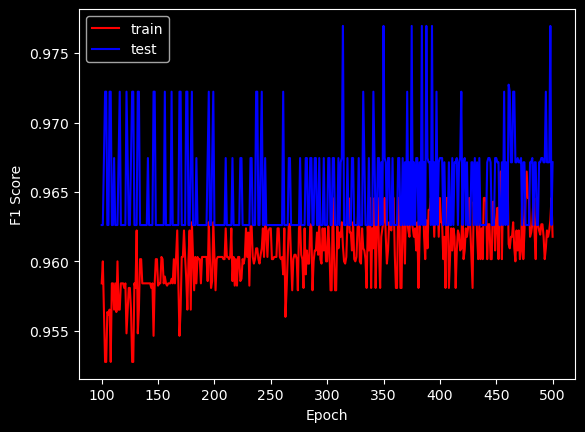

In [19]:
fig, ax = plt.subplots()
ax.set_xlabel("Epoch")
train_color = "red"
test_color = "blue"
train_score = ax.plot(results.iloc[100:]["Last Epoch"], results.iloc[100:]["Train F1 Score"], color = train_color, label = "train")
test_score = ax.plot(results.iloc[100:]["Last Epoch"], results.iloc[100:]["Test F1 Score"], color = test_color, label = "test")
ax.set_ylabel('F1 Score')
ax.legend()
# ax.set_yscale('log')